# Quantifying Shakespeare
Analyzing the frequencies of different letters in Shakespeare's work.

(Data from bit.ly/shakespeare-text)

In this notebooke
1. Read all of shakespeare into a list of strings
2. Count the frequencines of letters used
3. Visualize the frequencies with a bar graph

In [5]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read .txt file"""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        # strip leading white "    a    dog    " - > "a dog"
        line = line.strip()
        # everything lower case
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))

124456


# Count letters

In [6]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by increasing the value stored at key by 1"""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


In [7]:
def count_letters(lines: list[str]) -> dict[str,int]:
    counts: dict[str, int] = {}
    for words in lines:
        for letters in words:
            if letters.isalpha():
                tally(counts, letters)
    return counts

shakes_letters: dict[str, int] = count_letters(shakes_lines)
print(shakes_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, 'e': 447204, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, 'a': 289150, 'w': 89390, 'm': 111452, 'k': 35408, 'v': 37569, 'z': 1631, 'q': 3582}


# Sorting in lists and dicts

In [8]:
shakes_letters_list = list(shakes_letters.items())
shakes_letters_list = sorted(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
print(shakes_letters_sorted)


{'a': 289150, 'b': 61956, 'c': 88185, 'd': 149462, 'e': 447204, 'f': 80516, 'g': 68199, 'h': 236868, 'i': 253990, 'j': 4779, 'k': 35408, 'l': 170019, 'm': 111452, 'n': 243262, 'o': 314600, 'p': 58464, 'q': 3582, 'r': 237864, 's': 248989, 't': 329775, 'u': 128947, 'v': 37569, 'w': 89390, 'x': 5294, 'y': 94370, 'z': 1631}


# visualize data in bar graph

<BarContainer object of 26 artists>

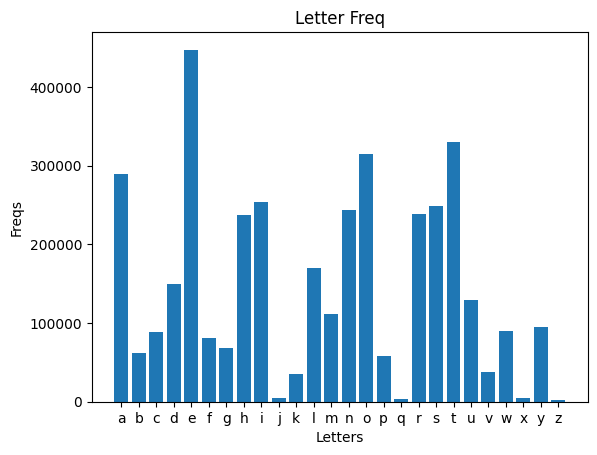

In [9]:
from matplotlib import pyplot

pyplot.title("Letter Freq")
pyplot.xlabel("Letters")
pyplot.ylabel("Freqs")
x_values: list[str] = shakes_letters_sorted.keys()
y_values: list[str] = shakes_letters_sorted.values()
pyplot.bar(x_values, y_values)